# Tarea 2
## Nombre: Daniel Pereira Sandino
## Matrícula: A00832699


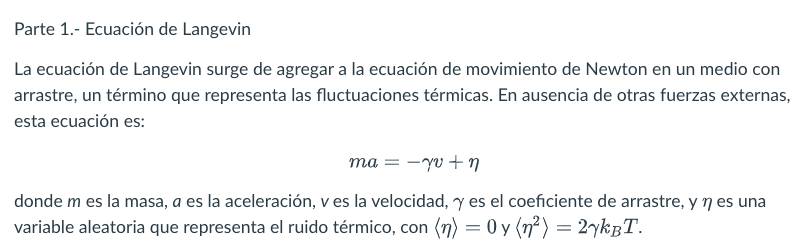

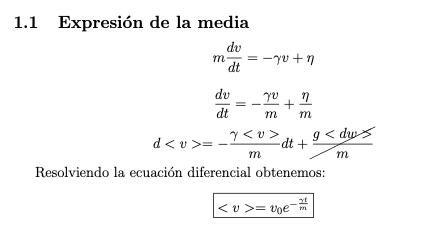

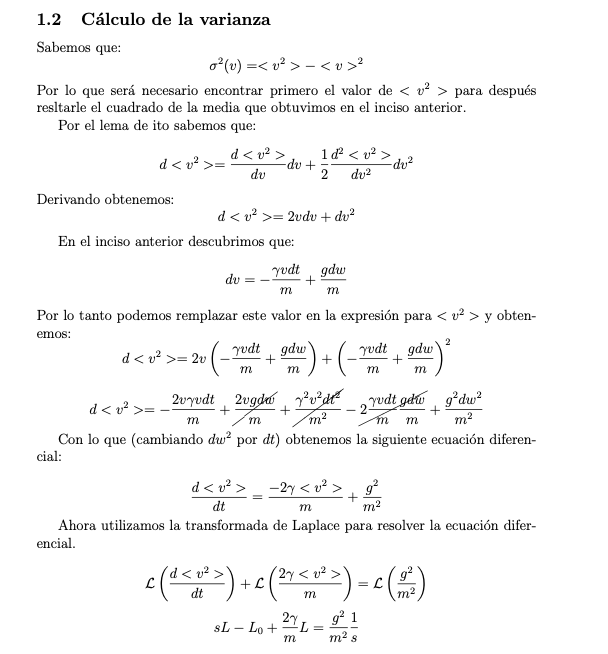

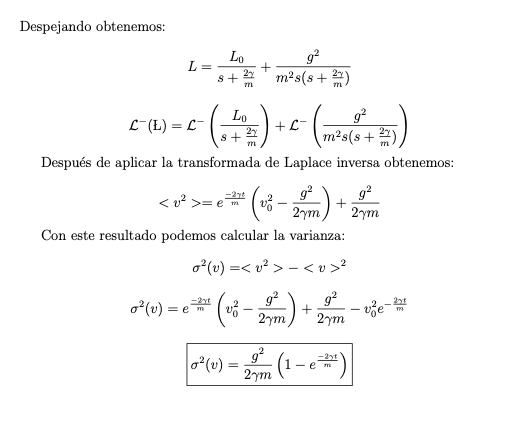

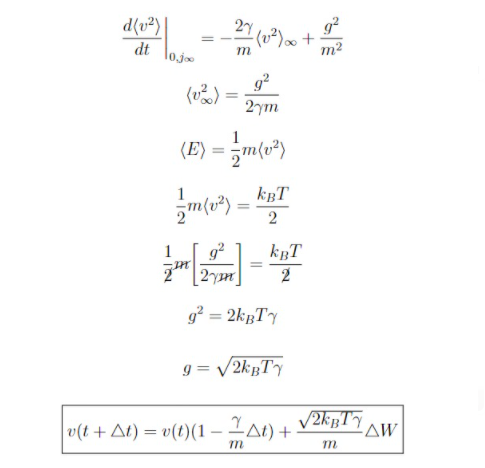

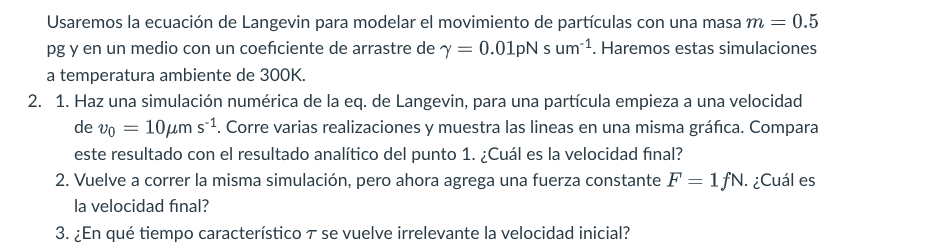

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


el valor de tau es: 50.0 


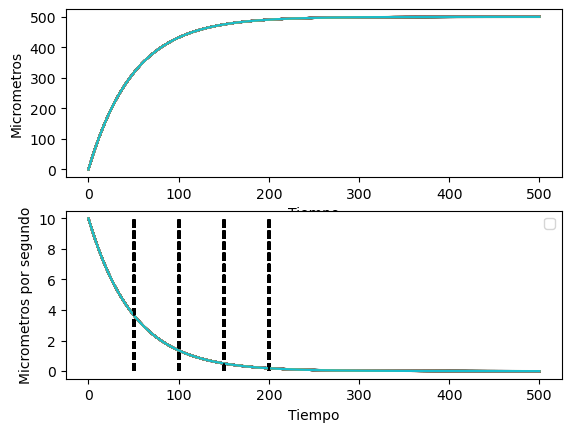

In [136]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 0
v0 = 10
kBT = 1.38066*10**-5
m = 0.5
gamma = 0.01
T = 300
dt = 0.01
etaDev = np.sqrt(2*gamma*kBT*dt)

t_points = np.arange(0, 500, dt)

position = np.zeros_like(t_points)
velocity = np.zeros_like(t_points)

position[0] = x0
velocity[0] = v0

def euler():
  for i in range(1, len(t_points)):
      velocity[i] = velocity[i - 1] + ((-gamma*velocity[i - 1]) * dt + etaDev*np.random.normal(0,np.sqrt(dt)))/m
      position[i] = position[i - 1] + velocity[i - 1] * dt
  return position,velocity

for i in range (100):
    position,velocity = euler()
    tau = (m/gamma)
    plt.subplot(2, 1, 1)
    plt.plot(t_points, position)
    plt.xlabel('Tiempo')
    plt.ylabel('Micrometros')
    
    plt.subplot(2, 1, 2)
    plt.plot(t_points, velocity)
    plt.xlabel('Tiempo')
    plt.ylabel('Micrometros por segundo')
    plt.plot((tau, tau), (0, 10), 'k--')
    plt.plot((2*tau, 2*tau), (0, 10), 'k--')
    plt.plot((3*tau, 3*tau), (0, 10), 'k--')
    plt.plot((4*tau, 4*tau), (0, 10), 'k--')
    
  
    

plt.legend()
print(f"el valor de tau es: {tau} ")

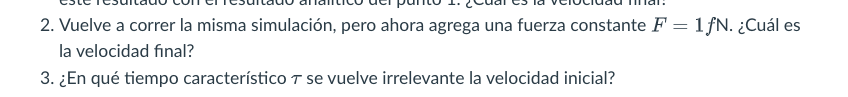

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


el tiempo tau es: 100.0


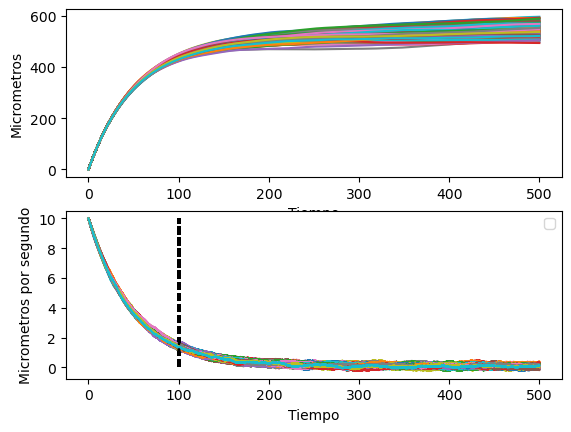

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
x0 = 0
v0 = 10
kBT = 1.38066e-5
m = 0.5
gamma = 0.01
T = 300

dt = 0.01
etaDev = np.sqrt(2*gamma*kBT*T)

t_points = np.arange(0, 500, dt)

position = np.zeros_like(t_points)
velocity = np.zeros_like(t_points)

position[0] = x0
velocity[0] = v0

def euler():
  for i in range(1, len(t_points)):
      velocity[i] = velocity[i - 1] + ((-gamma*velocity[i - 1]) * dt + etaDev*np.random.normal(0,np.sqrt(dt)))/m+((1*10**-3)*dt/m)
      position[i] = position[i - 1] + velocity[i - 1] * dt
  return position,velocity
for i in range (300):
    position,velocity = euler()
    tau = (m/gamma)*2
    plt.subplot(2, 1, 1)
    plt.plot(t_points, position)
    plt.xlabel('Tiempo')
    plt.ylabel('Micrometros')
    plt.subplot(2, 1, 2)
    plt.plot(t_points, velocity)
    plt.xlabel('Tiempo')
    plt.ylabel('Micrometros por segundo')
    plt.plot((tau, tau), (0, 10), 'k--')


plt.legend()
print(f"el tiempo tau es: {tau}")

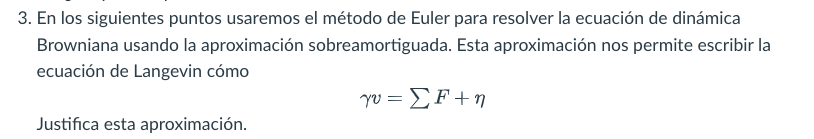

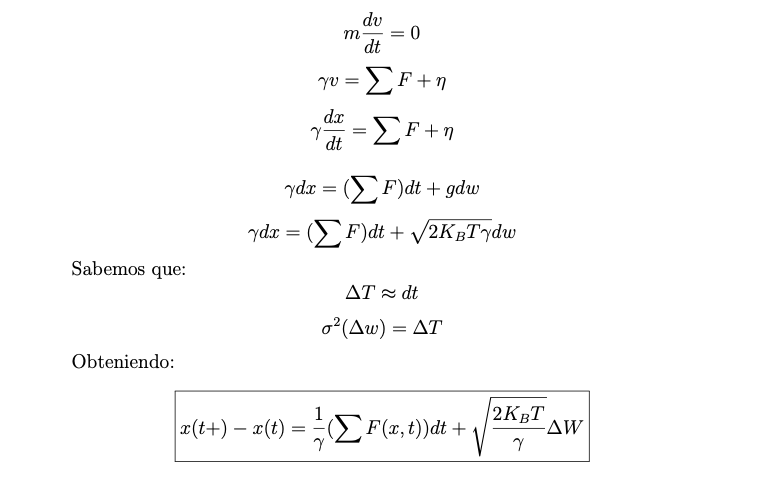

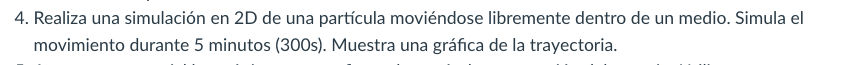

Text(0, 0.5, 'Y')

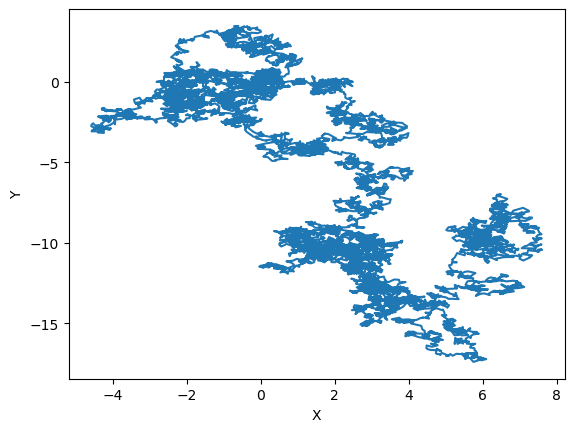

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
x = np.zeros(len(t))
vx = np.zeros(len(t))
mu=0
y = np.zeros(len(t))
vy = np.zeros(len(t))
sigma=np.sqrt(2*gamma*kBT*dt)
vx[0] = 10
vy[0] = 10

fig1, ax1 = plt.subplots()

for i in range(len(t)-1):
    x[i+1] = x[i] + np.sqrt((2*kBT*300)/gamma)*np.random.normal(0,np.sqrt(dt))
    y[i+1] = y[i] + np.sqrt((2*kBT*300)/gamma)*np.random.normal(0,np.sqrt(dt))
    
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")


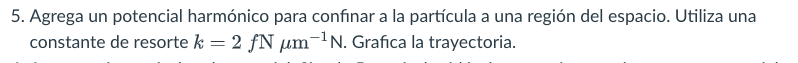

Text(0, 0.5, 'Y')

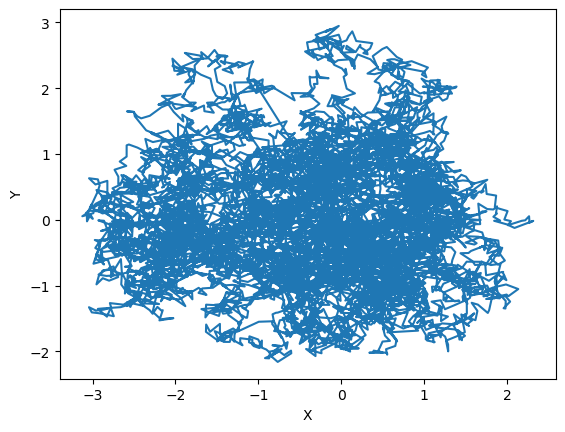

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
x = np.zeros(len(t))
vx = np.zeros(len(t))
mu=0
y = np.zeros(len(t))
vy = np.zeros(len(t))
sigma=np.sqrt(2*gamma*kBT*dt)
vx[0] = 10
vy[0] = 10
k=0.002

fig1, ax1 = plt.subplots()

for i in range(len(t)-1):
    x[i] = x[i - 1] + np.sqrt((2*kBT*300)/gamma)*np.random.normal(0,np.sqrt(dt))-k*x[i-1]
    y[i] = y[i - 1] + np.sqrt((2*kBT*300)/gamma)*np.random.normal(0,np.sqrt(dt))-k*y[i-1]
    
plt.plot(x,y)
plt.xlabel("X")
plt.ylabel("Y")

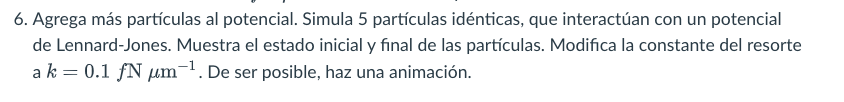

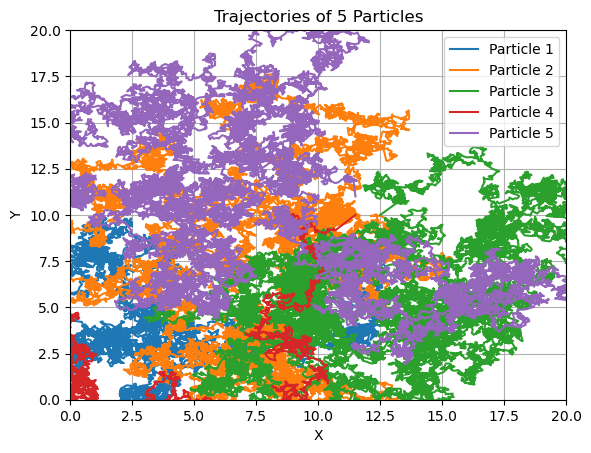

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
dt = 0.01
t = np.arange(0, 300, 0.01)
num_particles = 5
initial_conditions = np.array([[12.5, 12.5, 12.5, 11.5, 11.5],
                               [8, 9, 10, 10, 11]])
mu = 0
k_resorte = 0.1e-3
kBT = 1.3866e-5
gamma = 0.01
epsilon = 1
sigma = 0.5
T = 300

# Matrices para almacenar las posiciones
x = np.zeros((num_particles, len(t)))
y = np.zeros((num_particles, len(t)))

# Inicializar las condiciones iniciales
x[:, 0] = initial_conditions[0]
y[:, 0] = initial_conditions[1]


# Euler
for i in range(0, len(t)-1):
    for j in range(num_particles):
        Ftotal = 0
        posicion1 = np.array([x[j, i],y[j, i]])
        for k in range(num_particles):
            if k != j:
                posicion2 = np.array([x[k,i],y[k,i]])
                #delta_y = y[k, i] - y[j, i]
                #delta_r = np.sqrt(delta_x**2 + delta_y**2)
                vector = posicion2-posicion1
                r = np.linalg.norm(vector)
                Ftotal += (-24 * epsilon * ((2*(sigma**6) / (r**8)) - (sigma**12) / (r**14)) * r) *vector/r
                #print(Fx)
                #Fy += (-24 * epsilon * ((2*(sigma**6) / (delta_r**8)) - (sigma**12) / (delta_r**14)) * delta_r)*vector/r
        #particula_actual = np.array(x[j, i - 1],y[j, i - 1])
        f_resorte = -k_resorte*posicion1
        Ftotal+=f_resorte
        
        x[j, i+1] = x[j, i] + np.sqrt((2 * kBT * T) / gamma) * np.random.normal(0, np.sqrt(dt)) + (1/gamma)*(Ftotal[0])*dt
        y[j, i+1] = y[j, i] + np.sqrt((2 * kBT * T) / gamma) * np.random.normal(0, np.sqrt(dt)) + (1/gamma)*(Ftotal[1])*dt


# Create the figure and axes
fig, ax = plt.subplots()
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

# Plot the trajectories
for particle in range(num_particles):
    ax.plot(x[particle], y[particle], linestyle='-', label=f'Particle {particle+1}')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectories of 5 Particles')
plt.legend()
plt.grid()

plt.show()


Link del video: https://drive.google.com/file/d/1qt7EHs56Q99k-lZxhCxGUD2YzZTMWlAc/view?usp=sharing